# Imports

In [ ]:
import matplotlib.pyplot as plt       # Used For Data Visualization
import pandas as pd                   # Used For Tabular Data
import numpy as np                    # Used For Vector Operations
import statistics as st               # Used For Statistical Analysis
import math                           # Used For Mathematical Manipulation

# Retreive and Clean Data

In [ ]:
salary_df = pd.read_csv('/content/Salary_Data.csv.xls')
salary_df = salary_df.sample(frac=1)
salary_df

,YearsExperience,Salary
23,8.2,113812.0
25,9.0,105582.0
16,5.1,66029.0
26,9.5,116969.0
29,10.5,121872.0
19,6.0,93940.0
21,7.1,98273.0
0,1.1,39343.0
9,3.7,57189.0
7,3.2,54445.0


# Data Split

In [ ]:
train, valid, test = np.split(salary_df.sample(frac=1), (int(0.7 * len(salary_df)), int(0.85 * len(salary_df))))

# MSE Loss Function

In [ ]:
def loss(list1, list2):
  losses = []
  for i in range(len(list1)):
    unit_loss = (list1[i] - list2[i]) ** 2
    losses.append(unit_loss)
  loss = st.mean(losses)
  loss /= 2
  return loss

arr1 = [1, 2, 3]
arr2 = [1, 2, 6]
loss(arr1, arr2)

1.5

# Initial Parameter Vector

In [ ]:
init_theta1, init_theta0 = 8000, 20000
theta1, theta0 = 8000, 20000

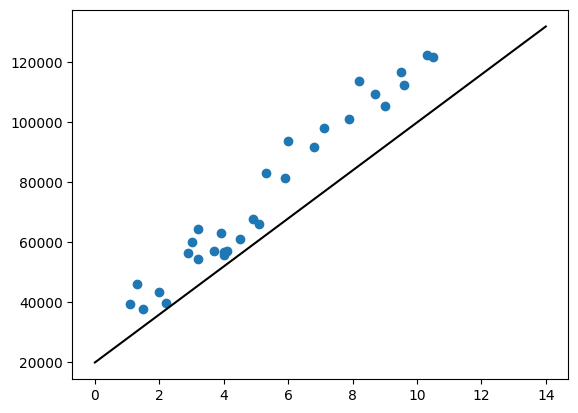

In [ ]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
x = np.arange(0, 15, 1)
y = theta1 * x + theta0
plt.plot(x, y, 'black');

# Hypothesis Function

In [ ]:
def hypothesis_func(list):
  hypothesized_data = [theta1 * x + theta0 for x in list]
  return hypothesized_data

# Initial Log Loss

In [ ]:
print(f"Initial Log Loss = {round(np.log(loss(hypothesis_func(valid['YearsExperience'].tolist()), valid['Salary'].tolist())), 3)}")

Initial Log Loss = 18.188


# Gradient Descent

In [ ]:
def gradient_1(list1, list2):
  change1 = []
  for i in range(len(list1)):
    unit_change1 = (list1[i] - list2[i]) * list1[i]
    change1.append(unit_change1)
  gradient1 = st.mean(change1)
  return gradient1

def gradient_0(list1, list2):
  change0 = []
  for i in range(len(list1)):
    unit_change0 = (list1[i] - list2[i])
    change0.append(unit_change0)
  gradient0 = st.mean(change0)
  return gradient0


# Normalizing Gradient Vector

In [ ]:
def normalize_grad(lst):
  den = 0
  for num in lst:
    den += (num) ** 2
  normal_grad = [z / math.sqrt(den) for z in lst]
  return normal_grad

# Training Epochs

In [ ]:
epochs = 120000
lr = 0.1
counter = 0
for _ in range(epochs):
  gradient1 = gradient_1(hypothesis_func(train['YearsExperience'].tolist()), train['Salary'].tolist())
  gradient0 = gradient_0(hypothesis_func(train['YearsExperience'].tolist()), train['Salary'].tolist())
  gradient_vector = [gradient1, gradient0]
  gradient1, gradient0 = normalize_grad(gradient_vector)
  theta1 = theta1 - lr * gradient1
  theta0 = theta0 - lr * gradient0
  val_loss  = np.log(np.log(loss(hypothesis_func(valid['YearsExperience'].tolist()), valid['Salary'].tolist())))
  if counter % 10000 == 0:
    print(f'Iteration: {counter}, Val Loss: {round(val_loss, 3)} theta_1: {round(theta1, 3)}, theta_0: {round(theta0, 3)}, Gradient Vector: {gradient_vector}')
  counter += 1
print(f'Iteration: {"{:.6f}".format(counter)}, Val Loss: {"{:.6f}".format(round(val_loss, 3))} theta_1: {"{:.6f}".format(round(theta1, 3))}, theta_0: {"{:.6f}".format(round(theta0, 3))}')
print(f'Parameter Vector: [{round(theta1, 3)}, {round(theta0, 3)}]')

Iteration: 0, Val Loss: 2.901 theta_1: 8000.1, theta_0: 20000.0, Gradient Vector: [-903249104.7619047, -13532.761904761905]
Iteration: 10000, Val Loss: 2.826 theta_1: 9000.1, theta_0: 20000.015, Gradient Vector: [-588221088.806422, -8604.17575544523]
Iteration: 20000, Val Loss: 2.796 theta_1: 10000.1, theta_0: 20000.03, Gradient Vector: [-207519402.84676638, -3675.5888979139086]
Iteration: 30000, Val Loss: 2.839 theta_1: 10468.354, theta_0: 20094.954, Gradient Vector: [-3542.572432200469, -1272.845519733513]
Iteration: 40000, Val Loss: 2.838 theta_1: 10439.193, theta_0: 20279.209, Gradient Vector: [-3436.754386378541, -1232.3129016286243]
Iteration: 50000, Val Loss: 2.837 theta_1: 10410.124, theta_0: 20462.631, Gradient Vector: [-3331.417879172734, -1192.1595903971954]
Iteration: 60000, Val Loss: 2.836 theta_1: 10381.146, theta_0: 20645.233, Gradient Vector: [-3226.5672217980027, -1152.3800514534705]
Iteration: 70000, Val Loss: 2.835 theta_1: 10352.256, theta_0: 20827.03, Gradient Vect

# Before and After Training

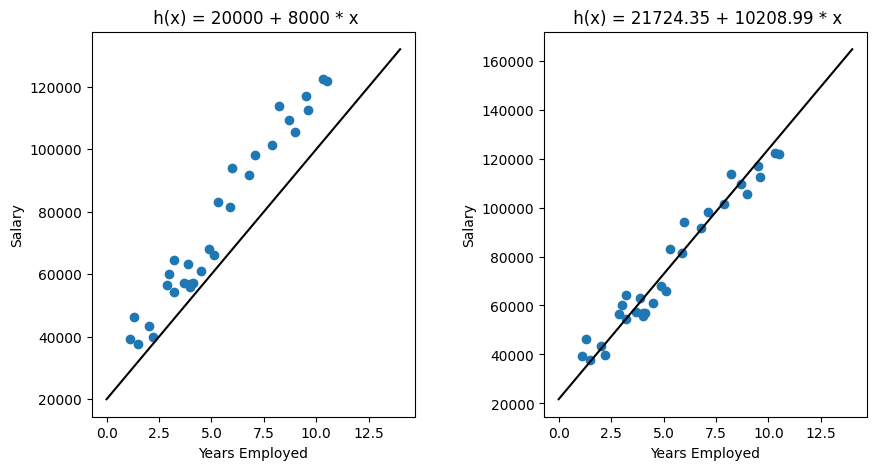

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.4)

ax1.scatter(salary_df['YearsExperience'], salary_df['Salary'])
x = np.arange(0, 15, 1)
y1 = init_theta1 * x + init_theta0
ax1.plot(x, y1, 'black')
ax1.set_xlabel('Years Employed')
ax1.set_ylabel('Salary')
ax1.title.set_text(f" h(x) = {init_theta0} + {init_theta1} * x")

ax2.scatter(salary_df['YearsExperience'], salary_df['Salary'])
x = np.arange(0, 15, 1)
y2 = theta1 * x + theta0
ax2.plot(x, y2, 'black');
ax2.set_xlabel('Years Employed')
ax2.set_ylabel('Salary')
ax2.title.set_text(f" h(x) = {round(theta0, 2)} + {round(theta1, 2)} * x");

In [ ]:
years = float(input('Enter years with company: '))
print(f"Salary is {round(theta1 * years + theta0, 2)}'")

Enter years with company: 5.7
Salary is 79382.19'


# Test Data

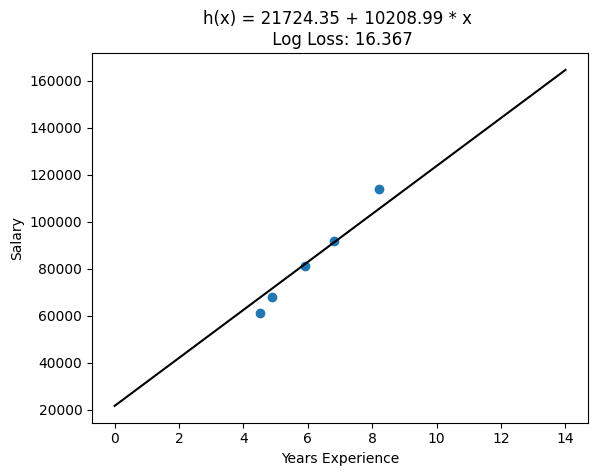

In [ ]:
plt.scatter(test['YearsExperience'], test['Salary'])
x = np.arange(0, 15, 1)
y = theta1 * x + theta0
plt.plot(x, y, 'black')
plt.title(f"h(x) = {round(theta0, 2)} + {round(theta1, 2)} * x \n Log Loss: {round(np.log(loss(hypothesis_func(test['YearsExperience'].tolist()), test['Salary'].tolist())), 3)}")
plt.xlabel('Years Experience')
plt.ylabel('Salary');